In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install  pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.2 MB/s eta 0:00:00


In [ ]:

import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/global-data-on-sustainable-energy.csv')

In [ ]:
df = df.rename(columns={'Primary energy consumption per capita (kWh/person)': 'total_energy_consumption',
                                    'Value_co2_emissions_kt_by_country': 'co2_emissions',
                                    'Year': 'year'})

In [ ]:
df_india = df[df['Entity'] == 'India']

In [ ]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 1534 to 1554
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            21 non-null     object 
 1   year                                                              21 non-null     int64  
 2   Access to electricity (% of population)                           21 non-null     float64
 3   Access to clean fuels for cooking                                 21 non-null     float64
 4   Renewable-electricity-generating-capacity-per-capita              21 non-null     float64
 5   Financial flows to developing countries (US $)                    20 non-null     float64
 6   Renewable energy share in the total final energy consumption (%)  20 non-null     float64
 7   Electricity from fossil fuels (TWh)  

In [ ]:
df_india.describe().T

,count,mean,std,min,25%,50%,75%,max
year,21.0,2.010000e+03,6.204837e+00,2.000000e+03,2.005000e+03,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),21.0,7.670433e+01,1.316417e+01,5.580000e+01,6.757981e+01,7.500000e+01,8.800000e+01,9.900000e+01
Access to clean fuels for cooking,21.0,3.923095e+01,1.386253e+01,2.230000e+01,2.860000e+01,3.540000e+01,4.820000e+01,6.790000e+01
Renewable-electricity-generating-capacity-per-capita,21.0,4.944714e+01,2.322014e+01,2.366000e+01,3.168000e+01,4.234000e+01,5.990000e+01,9.729000e+01
Financial flows to developing countries (US $),20.0,6.820330e+08,6.223656e+08,1.070000e+07,2.062725e+08,4.756850e+08,8.707800e+08,2.112780e+09
Renewable energy share in the total final energy consumption (%),20.0,3.875600e+01,5.504150e+00,3.241000e+01,3.373750e+01,3.678500e+01,4.435000e+01,4.711000e+01
Electricity from fossil fuels (TWh),21.0,8.307538e+02,2.801771e+02,4.753500e+02,5.793200e+02,7.717800e+02,1.080440e+03,1.276320e+03
Electricity from nuclear (TWh),21.0,2.750143e+01,1.043077e+01,1.523000e+01,1.783000e+01,2.308000e+01,3.741000e+01,4.516000e+01
Electricity from renewables (TWh),21.0,1.649219e+02,7.209382e+01,7.278000e+01,1.092000e+02,1.426100e+02,2.032100e+02,3.157600e+02
Low-carbon electricity (% electricity),21.0,1.839620e+01,1.939233e+00,1.453779e+01,1.755884e+01,1.850988e+01,1.930043e+01,2.306058e+01


In [ ]:
df_india.isnull().sum()

Entity                                                              0
year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      1
Renewable energy share in the total final energy consumption (%)    1
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
total_energy_consumption                                            0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         1
co2_emissions                                                       1
Renewables (% equiva

In [ ]:
df_india.fillna(value=0, inplace=True)  # Replace with 0



<ipython-input-10-71168c361cef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india.fillna(value=0, inplace=True)  # Replace with 0


In [ ]:
# Prepare separate datasets for energy consumption and CO2 emissions
df_energy = df_india[['year', 'total_energy_consumption']].set_index('year')
df_co2 = df_india[['year', 'co2_emissions']].set_index('year')

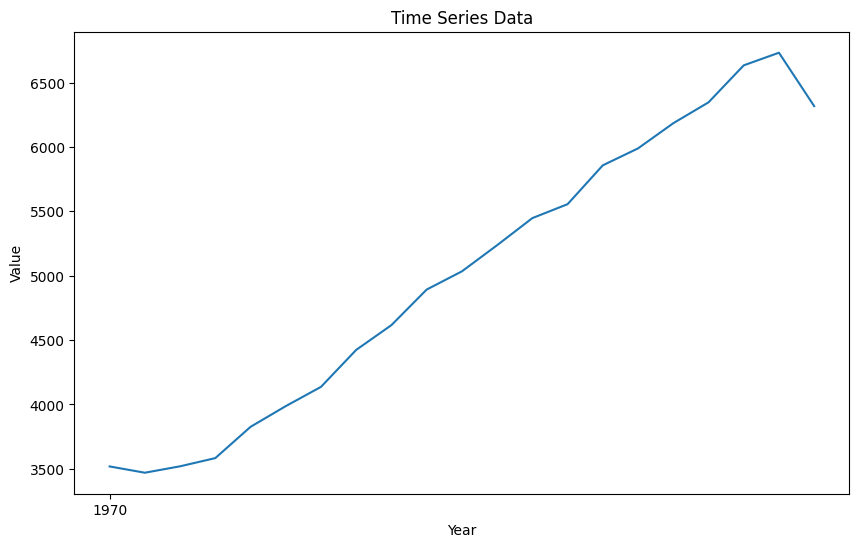

ADF Statistic: -1.6083452276278967
p-value: 0.4794001979796078
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
The time series is likely non-stationary.


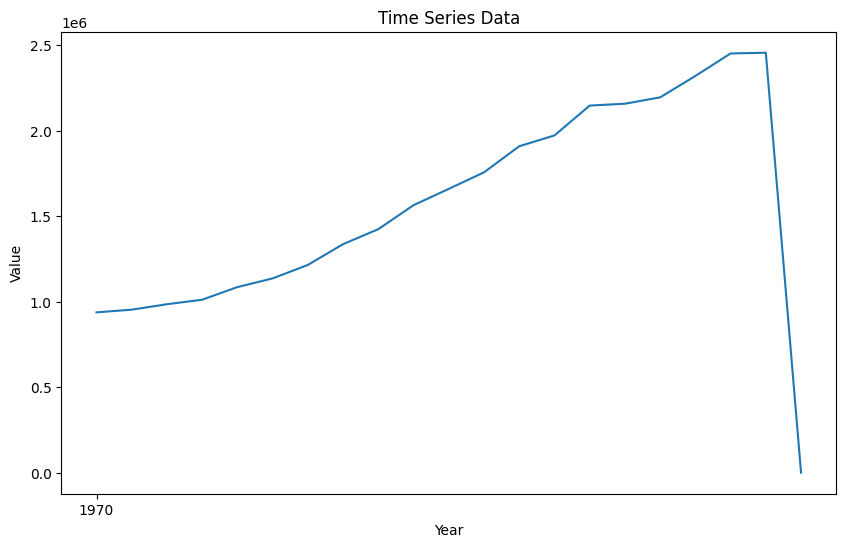

ADF Statistic: -1.8953486585329296
p-value: 0.3342524025142283
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
The time series is likely non-stationary.


In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Function to check stationarity
def check_stationarity(df):
    # Convert index to datetime if not already
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    # Visual inspection
    plt.figure(figsize=(10, 6))
    plt.plot(df)
    plt.title('Time Series Data')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.show()

    # Augmented Dickey-Fuller test
    adf_result = adfuller(df)
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    print('Critical Values:', adf_result[4])

    # Interpret ADF test results
    if adf_result[1] > 0.05:
        print('The time series is likely non-stationary.')
    else:
        print('The time series is likely stationary.')

# Check stationarity for energy consumption data
check_stationarity(df_energy['total_energy_consumption'])

# Check stationarity for CO2 emissions data
check_stationarity(df_co2['co2_emissions'])


ADF Statistic: -1.6083452276278967
p-value: 0.4794001979796078
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
ADF Statistic: -1.8953486585329296
p-value: 0.3342524025142283
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}


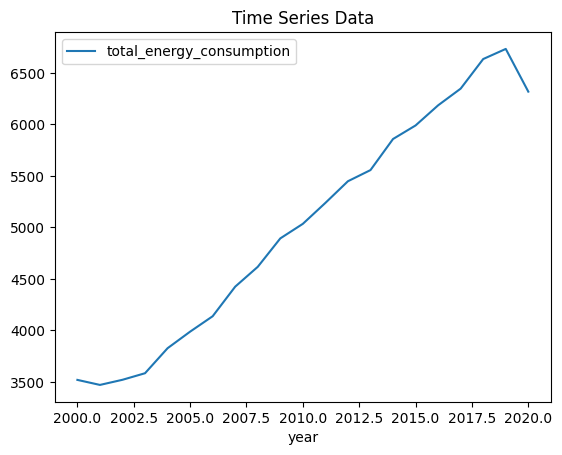

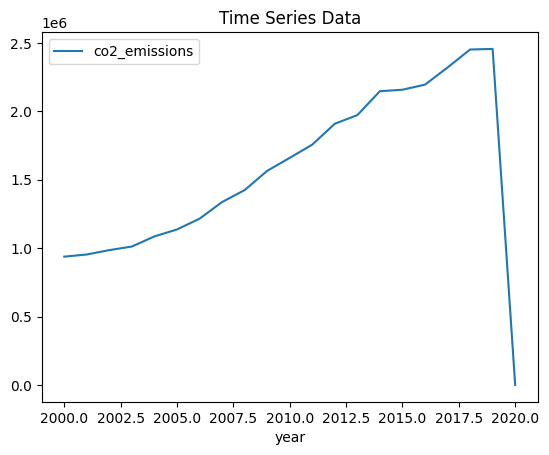

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Function to check stationarity and apply transformations
def check_stationarity(data):
    # Visual inspection (optional)
    data.plot(title='Time Series Data')

    # Augmented Dickey-Fuller test
    adf_result = adfuller(data)
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    print('Critical Values:', adf_result[4])


# Check stationarity and apply transformations for energy consumption datadf
df_energy_stationary = check_stationarity(df_energy)

# Check stationarity and apply transformations for CO2 emissions data
df_co2_stationary = check_stationarity(df_co2)


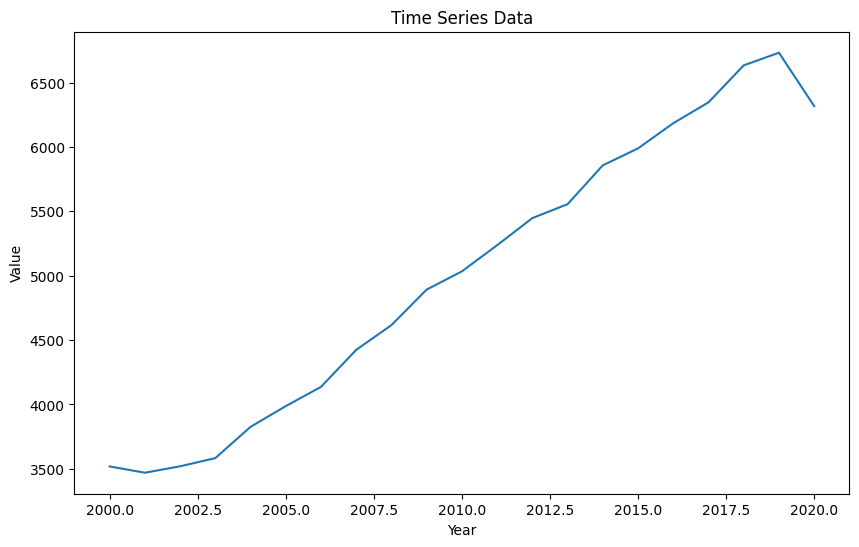

ADF Statistic: -1.6083452276278967
p-value: 0.4794001979796078
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
Data was not stationary. Differencing applied.


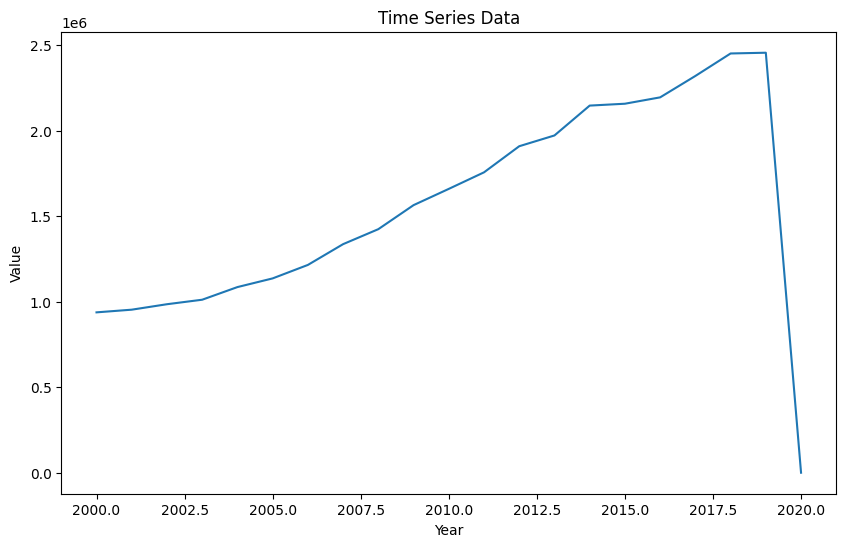

ADF Statistic: -1.8953486585329296
p-value: 0.3342524025142283
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
Data was not stationary. Differencing applied.


In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Function to check stationarity and apply transformations
def check_stationarity(data):
    # Visual inspection (optional)
    plt.figure(figsize=(10, 6))
    data.plot(title='Time Series Data')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.show()

    # Augmented Dickey-Fuller test
    adf_result = adfuller(data.values)  # Pass data as a one-dimensional array
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    print('Critical Values:', adf_result[4])

    # Apply transformation if necessary
    if adf_result[1] > 0.05:
        # Non-stationary, apply differencing
        diff_data = data.diff().dropna()  # Take first difference to remove trend
        print('Data was not stationary. Differencing applied.')
        return diff_data
    else:
        # Stationary
        print('Data is stationary.')
        return None  # No transformation applied, return None

# Check stationarity and apply transformations for energy consumption data
df_energy_stationary = check_stationarity(df_energy['total_energy_consumption'])

# Check stationarity and apply transformations for CO2 emissions data
df_co2_stationary = check_stationarity(df_co2['co2_emissions'])


In [ ]:
# Step 3: Model Training and Evaluation

## ARIMA Model
def train_arima(df):
    # Fit ARIMA model
    arima_model = auto_arima(df, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    arima_model.fit(df)
    return arima_model

# Train ARIMA model for energy consumption
arima_energy_model = train_arima(df_energy)

# Train ARIMA model for CO2 emissions
arima_co2_model = train_arima(df_co2)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=262.246, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=263.776, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=263.673, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=272.279, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.887 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=589.820, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=595.626, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=592.039, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=587.987, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=595.610, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.823 

In [ ]:
## ARIMA Model
def test_arima(df):
    # Fit ARIMA model
    arima_model = auto_arima(df, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    arima_model.fit(df)
    return arima_model

# Train ARIMA model for energy consumption
arima_energy_model = test_arima(df_energy)

# Train ARIMA model for CO2 emissions
arima_co2_model = test_arima(df_co2)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=262.246, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=263.776, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=263.673, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=272.279, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.470 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=589.820, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=595.626, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=592.039, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=587.987, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=595.610, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.394 

In [ ]:
# Function to calculate MSE and MAE
def calculate_errors(model, test_data):
    # Make predictions
    predictions = model.predict(n_periods=len(test_data))

    # Calculate MSE and MAE
    mse = mean_squared_error(test_data, predictions)
    mae = mean_absolute_error(test_data, predictions)

    return mse, mae

# Calculate errors for energy consumption ARIMA model
mse_energy_arima, mae_energy_arima = calculate_errors(arima_energy_model, df_energy)

# Calculate errors for CO2 emissions ARIMA model
mse_co2_arima, mae_co2_arima = calculate_errors(arima_co2_model, df_co2)

print("Energy Consumption ARIMA Model - MSE:", mse_energy_arima, "MAE:", mae_energy_arima)
print("CO2 Emissions ARIMA Model - MSE:", mse_co2_arima, "MAE:", mae_co2_arima)

Energy Consumption ARIMA Model - MSE: 8156250.934499874 MAE: 2841.6007783333316
CO2 Emissions ARIMA Model - MSE: 2804247996416.693 MAE: 1556170.4758666665


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Step 4: Prediction and Visualization

## ARIMA Predictions
# Make future predictions for the next 5 years
future_years = range(df_india['year'].max() + 1, df_india['year'].max() + 6)
future_energy_arima = arima_energy_model.predict(n_periods=5)
future_co2_arima = arima_co2_model.predict(n_periods=5)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
## Visualization
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

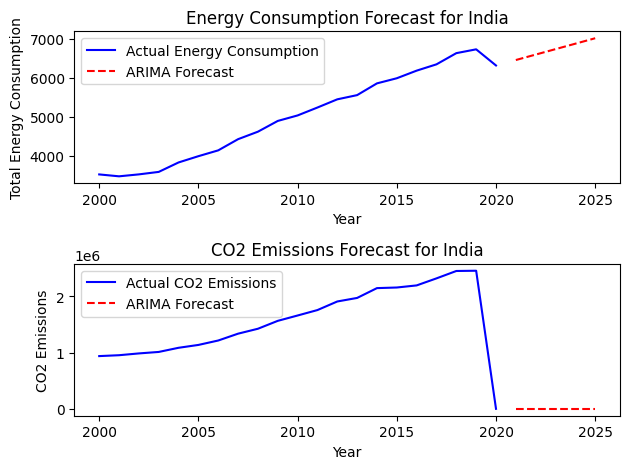

In [ ]:
# Energy Consumption Forecast
plt.subplot(2, 1, 1)
plt.plot(df_energy.index, df_energy['total_energy_consumption'], label='Actual Energy Consumption', color='blue')
plt.plot(future_years, future_energy_arima, label='ARIMA Forecast', linestyle='--', color='red')
plt.title('Energy Consumption Forecast for India')
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption')
plt.legend()


# CO2 Emissions Forecast
plt.subplot(2, 1, 2)
plt.plot(df_co2.index, df_co2['co2_emissions'], label='Actual CO2 Emissions', color='blue')
plt.plot(future_years, future_co2_arima, label='ARIMA Forecast', linestyle='--', color='red')
plt.title('CO2 Emissions Forecast for India')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
data_india_energy = {
    'date': pd.date_range(start='1/1/2020', end='12/31/2025', freq='Y'),
    'value': np.random.rand(72) * 100
}
df_india_energy = pd.DataFrame(data_india_energy)
df_india_energy.set_index('date', inplace=True)

data_india_co2 = {
    'date': pd.date_range(start='1/1/2020', end='12/31/2025', freq='Y'),
    'value': np.random.rand(72) * 100
}
df_india_co2 = pd.DataFrame(data_india_co2)
df_india_co2.set_index('date', inplace=True)


data_india_co2_yearly = {
    'date': pd.date_range(start='1/1/2020', end='12/31/2025', freq='Y'),
    'value': np.random.rand(6) * 100  # Generate random values for 6 years
}
df_india_co2 = pd.DataFrame(data_india_co2_yearly)
df_india_co2.set_index('date', inplace=True)  # Set 'date' column as index

# Prepare data for Random Forest for India
def prepare_data_rf(df):
    df['value_lag1'] = df['value'].shift(1)
    df.dropna(inplace=True)
    return df

df_india_energy_rf = prepare_data_rf(df_india_energy.copy())
df_india_co2_rf = prepare_data_rf(df_india_co2.copy())

# Split data into training and testing sets
def split_data(df):
    train_size = int(len(df) * 0.7)
    train, test = df.iloc[:train_size], df.iloc[train_size:]
    return train, test

train_india_energy_rf, test_india_energy_rf = split_data(df_india_energy_rf)
train_india_co2_rf, test_india_co2_rf = split_data(df_india_co2_rf)


ValueError: All arrays must be of the same length

NameError: name 'predictions_india_co2_rf' is not defined

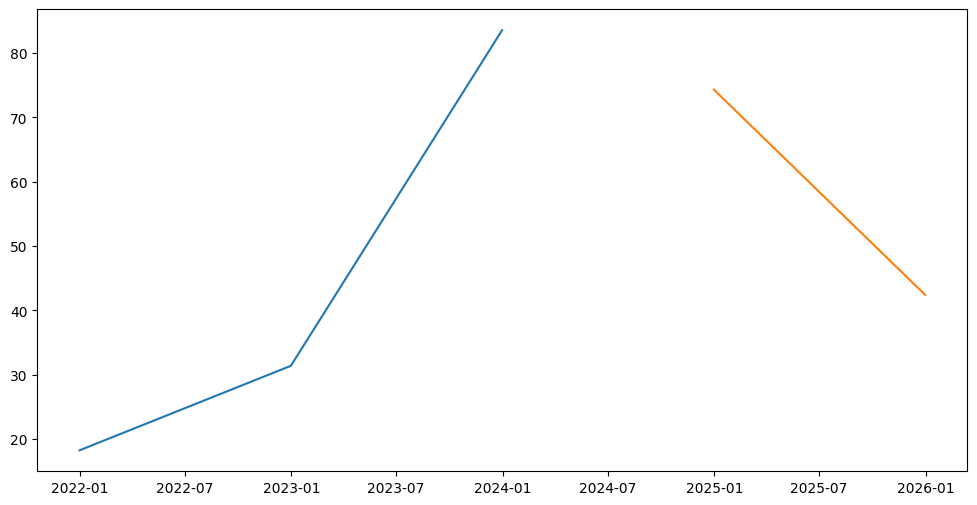

In [ ]:
# Plot the results for CO2 emissions in India
plt.figure(figsize=(12, 6))
plt.plot(train_india_co2_rf.index, train_india_co2_rf['value'], label='Training Data')
plt.plot(test_india_co2_rf.index, test_india_co2_rf['value'], label='Testing Data')
plt.plot(test_india_co2_rf.index, predictions_india_co2_rf, label='Predictions', color='red')
plt.title('CO2 Emissions in India')
plt.legend()
plt.show()

In [ ]:

# Sample data for energy consumption and CO2 emissions (replace with actual data)
data_energy = {
    'date': pd.date_range(start='1/1/2020', periods=100, freq='M'),
    'value': np.random.rand(100) * 100
}
df_energy = pd.DataFrame(data_energy)
df_energy.set_index('date', inplace=True)

data_co2 = {
    'date': pd.date_range(start='1/1/2020', periods=100, freq='M'),
    'value': np.random.rand(100) * 100
}
df_co2 = pd.DataFrame(data_co2)
df_co2.set_index('date', inplace=True)

# Train ARIMA model using auto_arima for energy consumption
def train_arima(df):
    arima_model = auto_arima(df, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    arima_model.fit(df)
    return arima_model

# Train Random Forest model
def train_rf(df):
    X_train = np.array(range(len(df))).reshape(-1, 1)
    y_train = df['value']
    model = RandomForestRegressor(n_estimators=100)
    model.fit(X_train, y_train)
    return model

# Train ARIMA model for energy consumption
arima_energy_model = train_arima(df_energy)

# Train ARIMA model for CO2 emissions
arima_co2_model = train_arima(df_co2)

# Train Random Forest model for energy consumption
rf_energy_model = train_rf(df_energy)

# Train Random Forest model for CO2 emissions
rf_co2_model = train_rf(df_co2)

# Make ARIMA predictions
predictions_energy_arima = arima_energy_model.predict(n_periods=len(df_energy))
predictions_co2_arima = arima_co2_model.predict(n_periods=len(df_co2))

# Make Random Forest predictions
predictions_energy_rf = rf_energy_model.predict(np.array(range(len(df_energy))).reshape(-1, 1))
predictions_co2_rf = rf_co2_model.predict(np.array(range(len(df_co2))).reshape(-1, 1))

# Evaluate ARIMA models using MSE and MAE
mse_energy_arima = mean_squared_error(df_energy['value'], predictions_energy_arima)
mae_energy_arima = mean_absolute_error(df_energy['value'], predictions_energy_arima)

mse_co2_arima = mean_squared_error(df_co2['value'], predictions_co2_arima)
mae_co2_arima = mean_absolute_error(df_co2['value'], predictions_co2_arima)

# Evaluate Random Forest models using MSE and MAE
mse_energy_rf = mean_squared_error(df_energy['value'], predictions_energy_rf)
mae_energy_rf = mean_absolute_error(df_energy['value'], predictions_energy_rf)

mse_co2_rf = mean_squared_error(df_co2['value'], predictions_co2_rf)
mae_co2_rf = mean_absolute_error(df_co2['value'], predictions_co2_rf)

print("ARIMA Model - Energy Consumption - MSE:", mse_energy_arima, "MAE:", mae_energy_arima)
print("ARIMA Model - CO2 Emissions - MSE:", mse_co2_arima, "MAE:", mae_co2_arima)

print("Random Forest Model - Energy Consumption - MSE:", mse_energy_rf, "MAE:", mae_energy_rf)
print("Random Forest Model - CO2 Emissions - MSE:", mse_co2_rf, "MAE:", mae_co2_rf)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1012.012, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=995.914, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1010.012, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=981.177, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=972.834, Time=0.15 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=971.670, Time=0.21 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=968.376, Time=0.25 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=966.421, Time=0.11 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=969.704, Time=0.11 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=958.800, Time=0.23 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=957.133, Time=0.35 

In [ ]:
df_china = df[df['Entity'] == 'China']

In [ ]:
df_china.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 714 to 734
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            21 non-null     object 
 1   year                                                              21 non-null     int64  
 2   Access to electricity (% of population)                           21 non-null     float64
 3   Access to clean fuels for cooking                                 21 non-null     float64
 4   Renewable-electricity-generating-capacity-per-capita              21 non-null     float64
 5   Financial flows to developing countries (US $)                    20 non-null     float64
 6   Renewable energy share in the total final energy consumption (%)  20 non-null     float64
 7   Electricity from fossil fuels (TWh)    

In [ ]:
df_china.describe().T

,count,mean,std,min,25%,50%,75%,max
year,21.0,2.010000e+03,6.204837e+00,2.000000e+03,2.005000e+03,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),21.0,9.907662e+01,1.065423e+00,9.702180e+01,9.822443e+01,9.970000e+01,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,21.0,5.771429e+01,1.274026e+01,4.200000e+01,4.630000e+01,5.560000e+01,6.840000e+01,7.940000e+01
Renewable-electricity-generating-capacity-per-capita,21.0,2.304252e+02,1.734169e+02,5.878000e+01,8.643000e+01,1.704100e+02,3.405500e+02,6.217400e+02
Financial flows to developing countries (US $),20.0,2.193260e+08,2.645144e+08,2.251000e+07,8.363500e+07,1.489150e+08,2.581425e+08,1.245180e+09
Renewable energy share in the total final energy consumption (%),20.0,1.649250e+01,5.993805e+00,1.134000e+01,1.224000e+01,1.392500e+01,1.812250e+01,2.963000e+01
Electricity from fossil fuels (TWh),21.0,3.234635e+03,1.366407e+03,1.113300e+03,2.042800e+03,3.326190e+03,4.345860e+03,5.184130e+03
Electricity from nuclear (TWh),21.0,1.242471e+02,1.079015e+02,1.674000e+01,5.309000e+01,7.474000e+01,1.713800e+02,3.662000e+02
Electricity from renewables (TWh),21.0,9.382352e+02,6.237188e+02,2.255600e+02,4.043700e+02,7.863800e+02,1.393660e+03,2.184940e+03
Low-carbon electricity (% electricity),21.0,2.258754e+01,5.173251e+00,1.715170e+01,1.851306e+01,2.056499e+01,2.704033e+01,3.298062e+01


In [ ]:
df_china.isnull().sum()

Entity                                                              0
year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      1
Renewable energy share in the total final energy consumption (%)    1
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
total_energy_consumption                                            0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         1
co2_emissions                                                       1
Renewables (% equiva

In [ ]:
df_china.fillna(value=0, inplace=True)  # Replace with 0

<ipython-input-26-8e5ad2238851>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china.fillna(value=0, inplace=True)  # Replace with 0


In [ ]:
# Prepare separate datasets for energy consumption and CO2 emissions
df_energy = df_china[['year', 'total_energy_consumption']].set_index('year')
df_co2 = df_china[['year', 'co2_emissions']].set_index('year')

In [ ]:
# Step 3: Model Training and Evaluation

## ARIMA Model
def train_arima(df):
    # Fit ARIMA model
    arima_model = auto_arima(df, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    arima_model.fit(df)
    return arima_model

# Train ARIMA model for energy consumption
arima_energy_model = train_arima(df_energy)

# Train ARIMA model for CO2 emissions
arima_co2_model = train_arima(df_co2)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=314.493, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=312.191, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=309.952, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=308.818, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=339.821, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=310.540, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=310.267, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=312.656, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=329.026, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.800 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=688.357, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=728.324, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=682.037, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=709.196, Time=0

In [ ]:
# Step 4: Prediction and Visualization

## ARIMA Predictions
# Make future predictions for the next 5 years
future_years = range(df_india['year'].max() + 1, df_india['year'].max() + 6)
future_energy_arima = arima_energy_model.predict(n_periods=5)
future_co2_arima = arima_co2_model.predict(n_periods=5)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
## Visualization
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

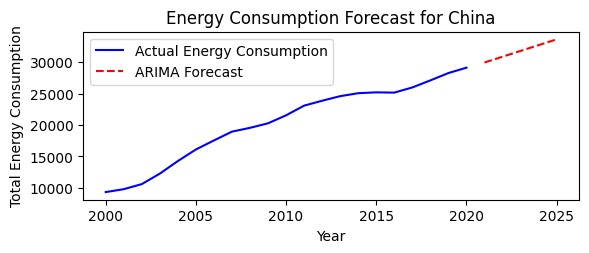

In [ ]:
# Energy Consumption Forecast
plt.subplot(2, 1, 1)
plt.plot(df_energy.index, df_energy['total_energy_consumption'], label='Actual Energy Consumption', color='blue')
plt.plot(future_years, future_energy_arima, label='ARIMA Forecast', linestyle='--', color='red')
plt.title('Energy Consumption Forecast for China')
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption')
plt.legend()

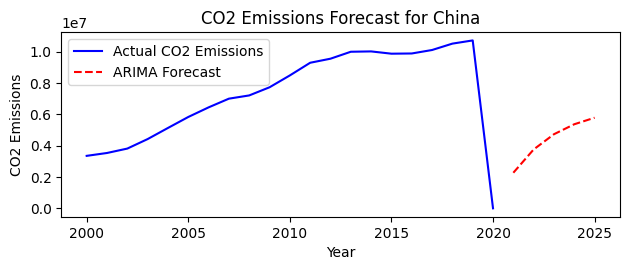

In [ ]:
# CO2 Emissions Forecast
plt.subplot(2, 1, 2)
plt.plot(df_co2.index, df_co2['co2_emissions'], label='Actual CO2 Emissions', color='blue')
plt.plot(future_years, future_co2_arima, label='ARIMA Forecast', linestyle='--', color='red')
plt.title('CO2 Emissions Forecast for China')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Sample data for energy consumption and CO2 emissions (replace with actual data)
data_energy = {
    'date': pd.date_range(start='1/1/2020', periods=100, freq='M'),
    'value': np.random.rand(100) * 100
}
df_energy = pd.DataFrame(data_energy)
df_energy.set_index('date', inplace=True)

data_co2 = {
    'date': pd.date_range(start='1/1/2020', periods=100, freq='M'),
    'value': np.random.rand(100) * 100
}
df_co2 = pd.DataFrame(data_co2)
df_co2.set_index('date', inplace=True)

# Train ARIMA model using auto_arima for energy consumption
def train_arima(df):
    arima_model = auto_arima(df, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    arima_model.fit(df)
    return arima_model

# Train Random Forest model
def train_rf(df):
    X_train = np.array(range(len(df))).reshape(-1, 1)
    y_train = df['value']
    model = RandomForestRegressor(n_estimators=100)
    model.fit(X_train, y_train)
    return model

# Train ARIMA model for energy consumption
arima_energy_model = train_arima(df_energy)

# Train ARIMA model for CO2 emissions
arima_co2_model = train_arima(df_co2)

# Train Random Forest model for energy consumption
rf_energy_model = train_rf(df_energy)

# Train Random Forest model for CO2 emissions
rf_co2_model = train_rf(df_co2)

# Make ARIMA predictions
predictions_energy_arima = arima_energy_model.predict(n_periods=len(df_energy))
predictions_co2_arima = arima_co2_model.predict(n_periods=len(df_co2))

# Make Random Forest predictions
predictions_energy_rf = rf_energy_model.predict(np.array(range(len(df_energy))).reshape(-1, 1))
predictions_co2_rf = rf_co2_model.predict(np.array(range(len(df_co2))).reshape(-1, 1))

# Evaluate ARIMA models using MSE and MAE
mse_energy_arima = mean_squared_error(df_energy['value'], predictions_energy_arima)
mae_energy_arima = mean_absolute_error(df_energy['value'], predictions_energy_arima)

mse_co2_arima = mean_squared_error(df_co2['value'], predictions_co2_arima)
mae_co2_arima = mean_absolute_error(df_co2['value'], predictions_co2_arima)

# Evaluate Random Forest models using MSE and MAE
mse_energy_rf = mean_squared_error(df_energy['value'], predictions_energy_rf)
mae_energy_rf = mean_absolute_error(df_energy['value'], predictions_energy_rf)

mse_co2_rf = mean_squared_error(df_co2['value'], predictions_co2_rf)
mae_co2_rf = mean_absolute_error(df_co2['value'], predictions_co2_rf)

print("ARIMA Model - Energy Consumption - MSE:", mse_energy_arima, "MAE:", mae_energy_arima)
print("ARIMA Model - CO2 Emissions - MSE:", mse_co2_arima, "MAE:", mae_co2_arima)

print("Random Forest Model - Energy Consumption - MSE:", mse_energy_rf, "MAE:", mae_energy_rf)
print("Random Forest Model - CO2 Emissions - MSE:", mse_co2_rf, "MAE:", mae_co2_rf)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=955.706, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1097.712, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=996.680, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1048.389, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=953.901, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1035.819, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=951.927, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=953.902, Time=0.36 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=977.584, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=946.779, Time=0.75 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=948.751, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=948.600, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=948.257, Time=0.75 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=948.019, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=94

In [ ]:
# Plot the results for CO2 emissions in India
plt.figure(figsize=(12, 6))
plt.plot(train_china_co2_rf.index, train_china_co2_rf['value'], label='Training Data')
plt.plot(test_china_co2_rf.index, test_china_co2_rf['value'], label='Testing Data')
plt.plot(test_china_co2_rf.index, predictions_china_co2_rf, label='Predictions', color='red')
plt.title('CO2 Emissions in China')
plt.legend()
plt.show()

NameError: name 'train_china_co2_rf' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
df_us = df[df['Entity'] == 'United States']

In [ ]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 3502 to 3522
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            21 non-null     object 
 1   year                                                              21 non-null     int64  
 2   Access to electricity (% of population)                           21 non-null     float64
 3   Access to clean fuels for cooking                                 21 non-null     float64
 4   Renewable-electricity-generating-capacity-per-capita              0 non-null      float64
 5   Financial flows to developing countries (US $)                    0 non-null      float64
 6   Renewable energy share in the total final energy consumption (%)  20 non-null     float64
 7   Electricity from fossil fuels (TWh)  

In [ ]:
df_us.describe().T

,count,mean,std,min,25%,50%,75%,max
year,21.0,2.010000e+03,6.204837e+00,2.000000e+03,2.005000e+03,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),21.0,1.000000e+02,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,21.0,1.000000e+02,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Financial flows to developing countries (US $),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Renewable energy share in the total final energy consumption (%),20.0,7.514000e+00,1.906905e+00,4.680000e+00,5.750000e+00,7.395000e+00,9.115000e+00,1.042000e+01
Electricity from fossil fuels (TWh),21.0,2.745333e+03,1.318256e+02,2.431900e+03,2.678680e+03,2.746210e+03,2.818280e+03,2.988240e+03
Electricity from nuclear (TWh),21.0,7.906005e+02,1.608657e+01,7.538900e+02,7.819900e+02,7.902000e+02,8.056900e+02,8.094100e+02
Electricity from renewables (TWh),21.0,4.873381e+02,1.608841e+02,2.800600e+02,3.509300e+02,4.244800e+02,5.564900e+02,8.214000e+02
Low-carbon electricity (% electricity),21.0,3.171265e+01,3.648372e+00,2.786507e+01,2.880855e+01,3.082400e+01,3.314577e+01,3.985180e+01


In [ ]:
df_us.fillna(value=0, inplace=True)

<ipython-input-38-076806821b0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us.fillna(value=0, inplace=True)


In [ ]:
df_us.isnull().sum()

Entity                                                              0
year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
total_energy_consumption                                            0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
co2_emissions                                                       0
Renewables (% equiva

In [ ]:
# Prepare separate datasets for energy consumption and CO2 emissions
df_energy = df_us[['year', 'total_energy_consumption']].set_index('year')
df_co2 = df_us[['year', 'co2_emissions']].set_index('year')

In [ ]:
df_energy

,total_energy_consumption
year,
2000,93999.860
2001,90772.180
2002,91201.060
2003,90619.110
2004,91504.484
2005,90654.530
2006,89067.040
2007,89395.140
2008,86378.650


In [ ]:
df_co2

,co2_emissions
year,
2000,5775810.000
2001,5748260.000
2002,5593029.785
2003,5658990.234
2004,5738290.039
2005,5753490.234
2006,5653080.078
2007,5736319.824
2008,5558379.883


In [ ]:
# Step 3: Model Training and Evaluation

## ARIMA Model
def train_arima(df):
    # Fit ARIMA model
    arima_model = auto_arima(df, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    arima_model.fit(df)
    return arima_model

# Train ARIMA model for energy consumption
arima_energy_model = train_arima(df_energy)

# Train ARIMA model for CO2 emissions
arima_co2_model = train_arima(df_co2)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=374.238, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=367.644, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=368.454, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=368.438, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=369.844, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=370.612, Time=0.35 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.492 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=615.316, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=617.262, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=617.437, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=614.800, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.

In [ ]:
# Step 4: Prediction and Visualization

## ARIMA Predictions
# Make future predictions for the next 5 years
future_years = range(df_india['year'].max() + 1, df_india['year'].max() + 6)
future_energy_arima = arima_energy_model.predict(n_periods=5)
future_co2_arima = arima_co2_model.predict(n_periods=5)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
## Visualization
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

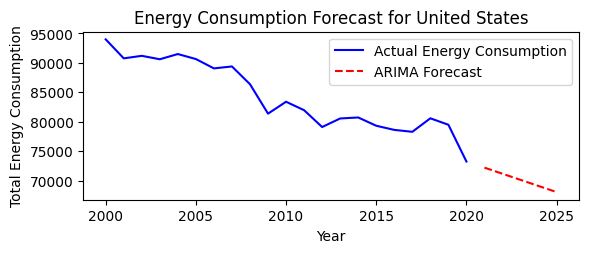

In [ ]:
# Energy Consumption Forecast
plt.subplot(2, 1, 1)
plt.plot(df_energy.index, df_energy['total_energy_consumption'], label='Actual Energy Consumption', color='blue')
plt.plot(future_years, future_energy_arima, label='ARIMA Forecast', linestyle='--', color='red')
plt.title('Energy Consumption Forecast for United States')
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption')
plt.legend()

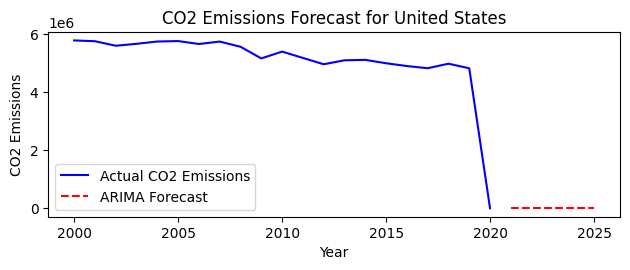

In [ ]:
# CO2 Emissions Forecast
plt.subplot(2, 1, 2)
plt.plot(df_co2.index, df_co2['co2_emissions'], label='Actual CO2 Emissions', color='blue')
plt.plot(future_years, future_co2_arima, label='ARIMA Forecast', linestyle='--', color='red')
plt.title('CO2 Emissions Forecast for United States')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()

plt.tight_layout()
plt.show()

Random Forest Energy Consumption in United States - MSE: 1723.874945393314, MAE: 32.827671216341066
Random Forest CO2 Emissions in United States - MSE: 1520.6144710461672, MAE: 31.942313997600742


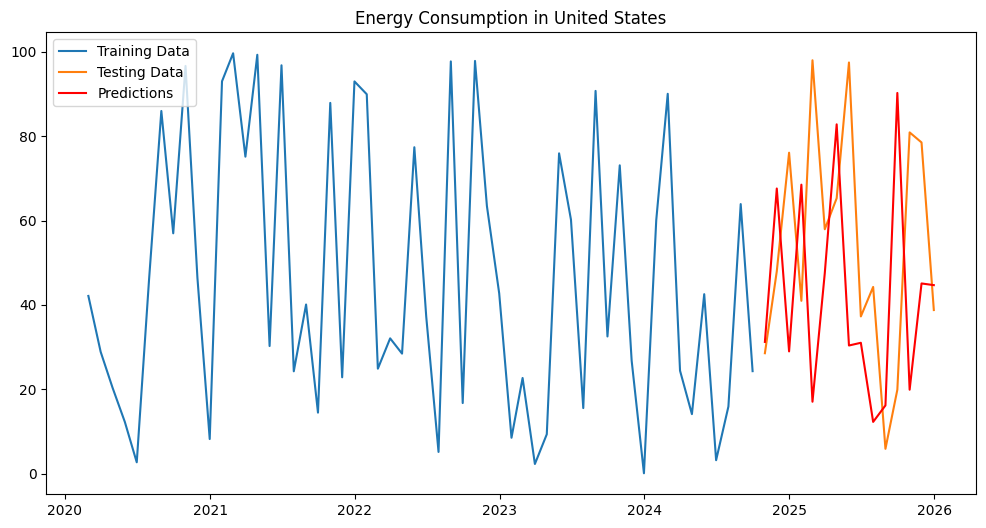

In [ ]:

# Sample data for energy consumption and CO2 emissions in china (replace with actual data)
data_us_energy = {
    'date': pd.date_range(start='1/1/2020', end='12/31/2025', freq='M'),
    'value': np.random.rand(72) * 100
}
df_us_energy = pd.DataFrame(data_us_energy)
df_us_energy.set_index('date', inplace=True)

data_us_co2 = {
    'date': pd.date_range(start='1/1/2020', end='12/31/2025', freq='M'),
    'value': np.random.rand(72) * 100
}
df_us_co2 = pd.DataFrame(data_us_co2)
df_us_co2.set_index('date', inplace=True)

# Prepare data for Random Forest by creating lag features
def prepare_data_rf(df):
    df['value_lag1'] = df['value'].shift(1)
    df.dropna(inplace=True)
    return df

# Prepare data for Random Forest for India
df_us_energy_rf = prepare_data_rf(df_us_energy.copy())
df_us_co2_rf = prepare_data_rf(df_us_co2.copy())

# Split data into training and testing sets
def split_data(df):
    train_size = int(len(df) * 0.8)
    train, test = df.iloc[:train_size], df.iloc[train_size:]
    return train, test

train_us_energy_rf, test_us_energy_rf = split_data(df_us_energy_rf)
train_us_co2_rf, test_us_co2_rf = split_data(df_us_co2_rf)

# Train Random Forest model for United States
def train_rf(train):
    X_train = train.drop('value', axis=1)
    y_train = train['value']
    model = RandomForestRegressor(n_estimators=100)
    model.fit(X_train, y_train)
    return model

# Train Random Forest models for United States
rf_us_energy_model = train_rf(train_us_energy_rf)
rf_us_co2_model = train_rf(train_us_co2_rf)

# Make predictions
X_test_us_energy = test_us_energy_rf.drop('value', axis=1)
predictions_us_energy_rf = rf_us_energy_model.predict(X_test_us_energy)

X_test_us_co2 = test_us_co2_rf.drop('value', axis=1)
predictions_us_co2_rf = rf_us_co2_model.predict(X_test_us_co2)

# Evaluate models
mse_us_energy_rf = mean_squared_error(test_us_energy_rf['value'], predictions_us_energy_rf)
mae_us_energy_rf = mean_absolute_error(test_us_energy_rf['value'], predictions_us_energy_rf)

mse_us_co2_rf = mean_squared_error(test_us_co2_rf['value'], predictions_us_co2_rf)
mae_us_co2_rf = mean_absolute_error(test_us_co2_rf['value'], predictions_us_co2_rf)

print(f'Random Forest Energy Consumption in United States - MSE: {mse_us_energy_rf}, MAE: {mae_us_energy_rf}')
print(f'Random Forest CO2 Emissions in United States - MSE: {mse_us_co2_rf}, MAE: {mae_us_co2_rf}')

# Plot the results for energy consumption United States
plt.figure(figsize=(12, 6))
plt.plot(train_us_energy_rf.index, train_us_energy_rf['value'], label='Training Data')
plt.plot(test_us_energy_rf.index, test_us_energy_rf['value'], label='Testing Data')
plt.plot(test_us_energy_rf.index, predictions_us_energy_rf, label='Predictions', color='red')
plt.title('Energy Consumption in United States')
plt.legend()
plt.show()

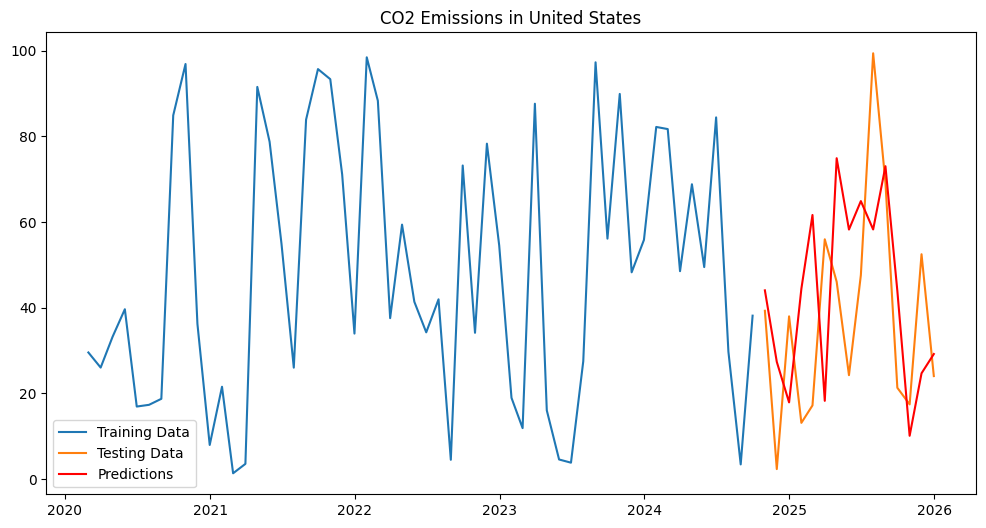

In [ ]:
# Plot the results for CO2 emissions in India
plt.figure(figsize=(12, 6))
plt.plot(train_us_co2_rf.index, train_us_co2_rf['value'], label='Training Data')
plt.plot(test_us_co2_rf.index, test_us_co2_rf['value'], label='Testing Data')
plt.plot(test_us_co2_rf.index, predictions_us_co2_rf, label='Predictions', color='red')
plt.title('CO2 Emissions in United States')
plt.legend()
plt.show()

In [ ]:
from xgboost import XGBRegressor

XGBoost Energy Consumption in the United States - MSE: 1719.6394139223944, MAE: 35.60259717240425
XGBoost CO2 Emissions in the United States - MSE: 1046.2062582656602, MAE: 26.85564189287919


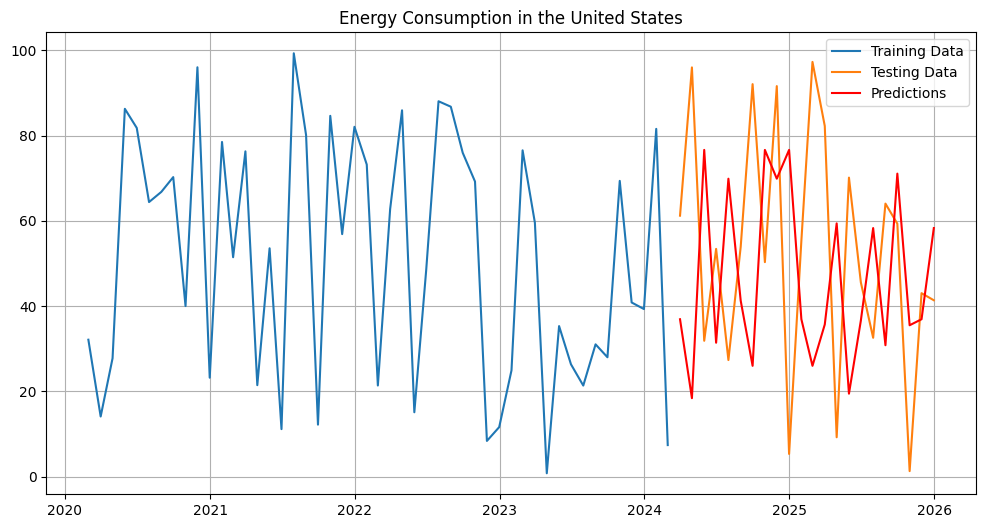

In [ ]:
# Prepare data by creating lag features
def prepare_data(df):
    df['value_lag1'] = df['value'].shift(1)
    df.dropna(inplace=True)
    return df

# Prepare data for the US
df_us_energy_prepared = prepare_data(df_us_energy.copy())
df_us_co2_prepared = prepare_data(df_us_co2.copy())

# Split data into training and testing sets
def split_data(df):
    train_size = int(len(df) * 0.7)
    train, test = df.iloc[:train_size], df.iloc[train_size:]
    return train, test

train_us_energy, test_us_energy = split_data(df_us_energy_prepared)
train_us_co2, test_us_co2 = split_data(df_us_co2_prepared)

# Train XGBoost model for the US
def train_xgb(train):
    X_train = train.drop('value', axis=1)
    y_train = train['value']
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
    model.fit(X_train, y_train)
    return model

# Train XGBoost models for the US
xgb_us_energy_model = train_xgb(train_us_energy)
xgb_us_co2_model = train_xgb(train_us_co2)

# Make predictions
X_test_us_energy = test_us_energy.drop('value', axis=1)
predictions_us_energy = xgb_us_energy_model.predict(X_test_us_energy)

X_test_us_co2 = test_us_co2.drop('value', axis=1)
predictions_us_co2 = xgb_us_co2_model.predict(X_test_us_co2)

# Evaluate models
mse_us_energy = mean_squared_error(test_us_energy['value'], predictions_us_energy)
mae_us_energy = mean_absolute_error(test_us_energy['value'], predictions_us_energy)

mse_us_co2 = mean_squared_error(test_us_co2['value'], predictions_us_co2)
mae_us_co2 = mean_absolute_error(test_us_co2['value'], predictions_us_co2)

print(f'XGBoost Energy Consumption in the United States - MSE: {mse_us_energy}, MAE: {mae_us_energy}')
print(f'XGBoost CO2 Emissions in the United States - MSE: {mse_us_co2}, MAE: {mae_us_co2}')

# Plot the results for energy consumption in the United States
plt.figure(figsize=(12, 6))
plt.plot(train_us_energy.index, train_us_energy['value'], label='Training Data')
plt.plot(test_us_energy.index, test_us_energy['value'], label='Testing Data')
plt.plot(test_us_energy.index, predictions_us_energy, label='Predictions', color='red')
plt.title('Energy Consumption in the United States')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Function to train Gradient Boosting model
def train_gbm(train):
    X_train = train.drop('value', axis=1)
    y_train = train['value']
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
    model.fit(X_train, y_train)
    return model

# Train Gradient Boosting models for energy consumption and CO2 emissions in the US
gbm_us_energy_model = train_gbm(train_us_energy)
gbm_us_co2_model = train_gbm(train_us_co2)

# Make predictions using Gradient Boosting models
predictions_us_energy_gbm = gbm_us_energy_model.predict(X_test_us_energy)
predictions_us_co2_gbm = gbm_us_co2_model.predict(X_test_us_co2)

# Evaluate Gradient Boosting models
mse_us_energy_gbm = mean_squared_error(test_us_energy['value'], predictions_us_energy_gbm)
mae_us_energy_gbm = mean_absolute_error(test_us_energy['value'], predictions_us_energy_gbm)

mse_us_co2_gbm = mean_squared_error(test_us_co2['value'], predictions_us_co2_gbm)
mae_us_co2_gbm = mean_absolute_error(test_us_co2['value'], predictions_us_co2_gbm)

print(f'Gradient Boosting Energy Consumption in the United States - MSE: {mse_us_energy_gbm}, MAE: {mae_us_energy_gbm}')
print(f'Gradient Boosting CO2 Emissions in the United States - MSE: {mse_us_co2_gbm}, MAE: {mae_us_co2_gbm}')


Gradient Boosting Energy Consumption in the United States - MSE: 1298.6583917179034, MAE: 27.80991729595647
Gradient Boosting CO2 Emissions in the United States - MSE: 859.1357545499814, MAE: 25.50031125556326


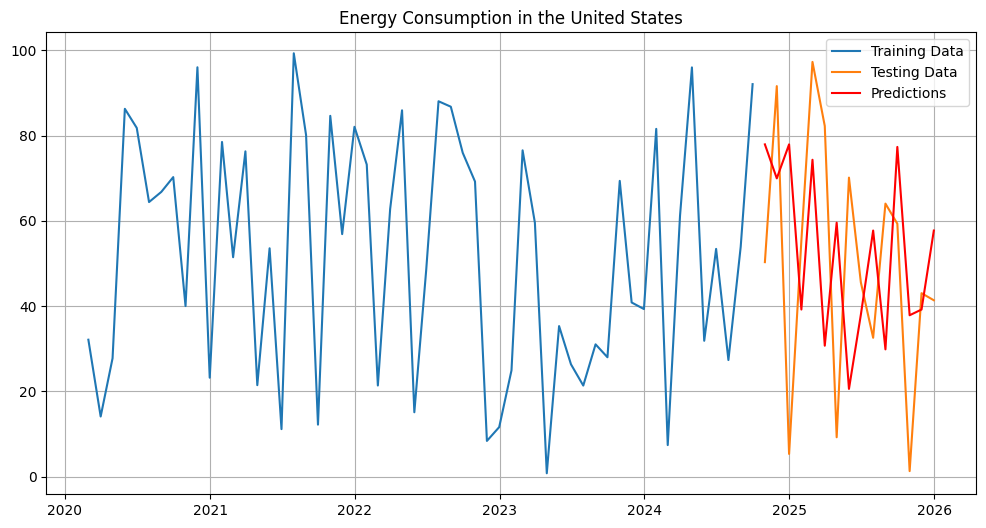

In [ ]:
# Plot the results for energy consumption in the United States
plt.figure(figsize=(12, 6))
plt.plot(train_us_energy.index, train_us_energy['value'], label='Training Data')
plt.plot(test_us_energy.index, test_us_energy['value'], label='Testing Data')
plt.plot(test_us_energy.index, predictions_us_energy, label='Predictions', color='red')
plt.title('Energy Consumption in the United States')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.svm import SVR

def train_svr(train):
    X_train = train.drop('value', axis=1)
    y_train = train['value']
    model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
    model.fit(X_train, y_train)
    return model

svr_us_energy_model = train_svr(train_us_energy)
svr_us_co2_model = train_svr(train_us_co2)

predictions_us_energy_svr = svr_us_energy_model.predict(X_test_us_energy)
predictions_us_co2_svr = svr_us_co2_model.predict(X_test_us_co2)

mse_us_energy_svr = mean_squared_error(test_us_energy['value'], predictions_us_energy_svr)
mae_us_energy_svr = mean_absolute_error(test_us_energy['value'], predictions_us_energy_svr)

mse_us_co2_svr = mean_squared_error(test_us_co2['value'], predictions_us_co2_svr)
mae_us_co2_svr = mean_absolute_error(test_us_co2['value'], predictions_us_co2_svr)

print(f'Support Vector Regressor Energy Consumption in the United States - MSE: {mse_us_energy_svr}, MAE: {mae_us_energy_svr}')
print(f'Support Vector Regressor CO2 Emissions in the United States - MSE: {mse_us_co2_svr}, MAE: {mae_us_co2_svr}')


Support Vector Regressor Energy Consumption in the United States - MSE: 981.2588755585881, MAE: 23.829251202110406
Support Vector Regressor CO2 Emissions in the United States - MSE: 692.495357253393, MAE: 21.063675709124766


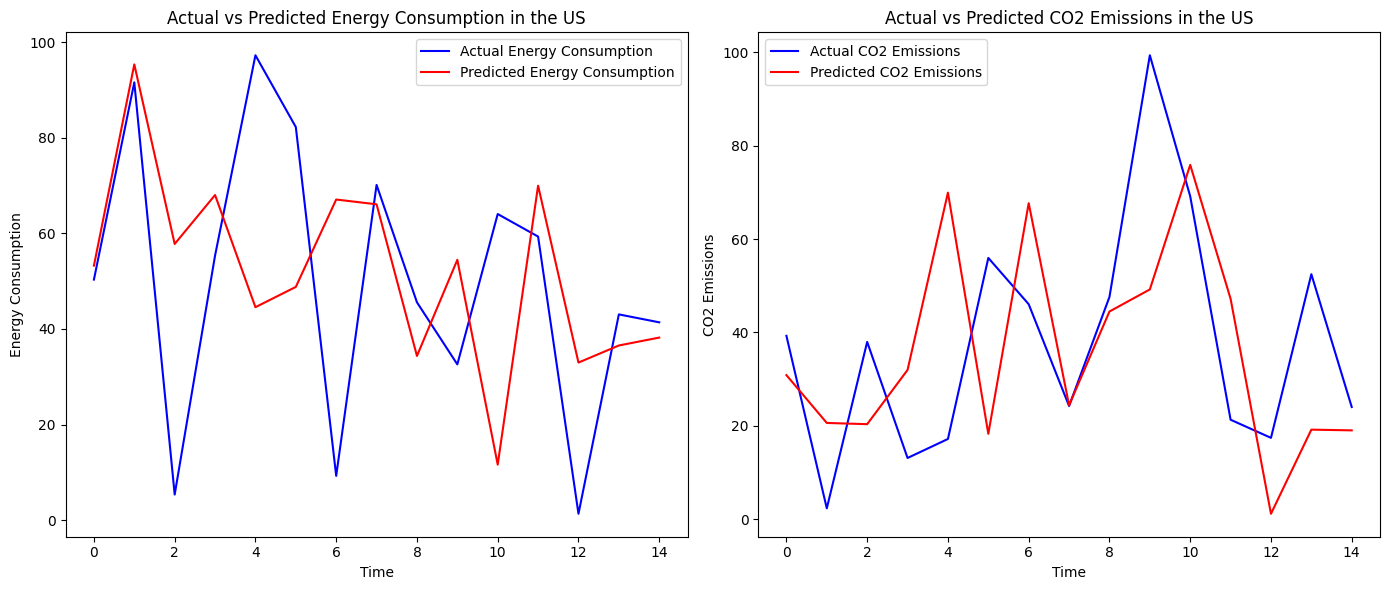

In [ ]:
# Visualization of the results
# Plot energy consumption
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(test_us_energy['value'].values, label='Actual Energy Consumption', color='blue')
plt.plot(predictions_us_energy_svr, label='Predicted Energy Consumption', color='red')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption in the US')
plt.legend()

# Plot CO2 emissions
plt.subplot(1, 2, 2)
plt.plot(test_us_co2['value'].values, label='Actual CO2 Emissions', color='blue')
plt.plot(predictions_us_co2_svr, label='Predicted CO2 Emissions', color='red')
plt.xlabel('Time')
plt.ylabel('CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions in the US')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
def train_and_predict_svr(data_train, data_test, target_variable):
  """
  Trains SVR model with RFE for feature selection and predicts for next 5 years.

  Args:
      data_train (pandas.DataFrame): Training data.
      data_test (pandas.DataFrame): Testing data.
      target_variable (str): Name of the target variable (e.g., 'value').

  Returns:
      tuple: (final_model, predictions)
  """
  X_train = data_train.drop(target_variable, axis=1)
  y_train = data_train[target_variable]

  # Check for constant features (optional)
  constant_features = [col for col in X_train.columns if X_train[col].nunique() == 1]
  if constant_features:
      print(f"Warning: Removing constant features: {constant_features}")
      X_train.drop(constant_features, axis=1, inplace=True)
      data_test.drop(constant_features, axis=1, inplace=True)

  # Feature selection with RFE (assuming at least 2 features remain)
  # Proper indentation here (one level indented)
  model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
  rfe = RFE(estimator=model, n_features_to_select=10)  # Choose desired number of features
  rfe.fit(X_train, y_train)
  support = rfe.support_
  X_train_reduced = X_train[support]

  # Train final SVR model with selected features
  final_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1).fit(X_train_reduced, y_train)

  # Predict for next 5 years (adjust based on your data frequency)
  predictions = final_model.predict(data_test.drop(target_variable, axis=1)[support])

  return final_model, predictions


In [ ]:
print(test_us_energy.columns.tolist())  # Print column names of your DataFrame


['value', 'value_lag1']


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE
import pandas as pd  # Import pandas for date manipulation

# Assuming you have your data loaded into pandas DataFrames:
# - train_us_energy (training data for energy consumption)
# - train_us_co2 (training data for CO2 emissions)
# - test_us_energy (testing data for energy consumption)
# - test_us_co2 (testing data for CO2 emissions)

def train_and_predict_svr(data_train, data_test, target_variable):
  """
  Trains SVR model with RFE for feature selection and predicts for next 5 years.

  Args:
      data_train (pandas.DataFrame): Training data.
      data_test (pandas.DataFrame): Testing data.
      target_variable (str): Name of the target variable (e.g., 'value').

  Returns:
      tuple: (final_model, predictions)
  """
  X_train = data_train.drop(target_variable, axis=1)
  y_train = data_train[target_variable]

  # Check for constant features (optional)
  constant_features = [col for col in X_train.columns if X_train[col].nunique() == 1]
  if constant_features:
      print(f"Warning: Removing constant features: {constant_features}")
      X_train.drop(constant_features, axis=1, inplace=True)
      data_test.drop(constant_features, axis=1, inplace=True)

  # Feature selection with RFE (assuming at least 2 features remain)
  model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
  rfe = RFE(estimator=model, n_features_to_select=10)  # Choose desired number of features
  rfe.fit(X_train, y_train)
  support = rfe.support_
  X_train_reduced = X_train[support]

  # Train final SVR model with selected features
  final_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1).fit(X_train_reduced, y_train)

  # Predict for next 5 years (adjust based on your data frequency)
  predictions = final_model.predict(data_test.drop(target_variable, axis=1)[support])

  return final_model, predictions

# Train and predict energy consumption
svr_model_energy, energy_predictions = train_and_predict_svr(train_us_energy, test_us_energy, 'value')

# Train and predict CO2 emissions
svr_model_co2, co2_predictions = train_and_predict_svr(train_us_co2, test_us_co2, 'value')

# Calculate errors for testing data (optional)
mse_energy_svr = mean_squared_error(test_us_energy['value'], energy_predictions)
mae_energy_svr = mean_absolute_error(test_us_energy['value'], energy_predictions)

mse_co2_svr = mean_squared_error(test_us_co2['value'], co2_predictions)
mae_co2_svr = mean_absolute_error(test_us_co2['value'], co2_predictions)

print(f'Energy Consumption - MSE: {mse_energy_svr}, MAE: {mae_energy_svr}')
print(f'CO2 Emissions - MSE: {mse_co2_svr}, MAE: {mae_co2_svr}')

# Visualization

# Assuming your test data has a 'date' or 'time' column for x-axis
plt.figure(figsize=(14, 12))

# Plot energy consumption - Actual vs Predicted vs Predicted for next 5 years
plt.subplot(2, 1, 1)
plt.plot(test_us_energy['date'], test_us_energy['value'], label='Actual Consumption', color='blue')
plt.plot(test_us_energy['date'], energy_predictions, label='Predicted Consumption', color='red')
print(f"Number of features in train_us_energy before dropping target: {len(train_us_energy.columns)}")
rfe = RFE(estimator=model, n_features_to_select=1)  # Change to 1 if necessary


ValueError: Found array with 1 feature(s) (shape=(56, 1)) while a minimum of 2 is required by RFE.

KeyError: 'year'

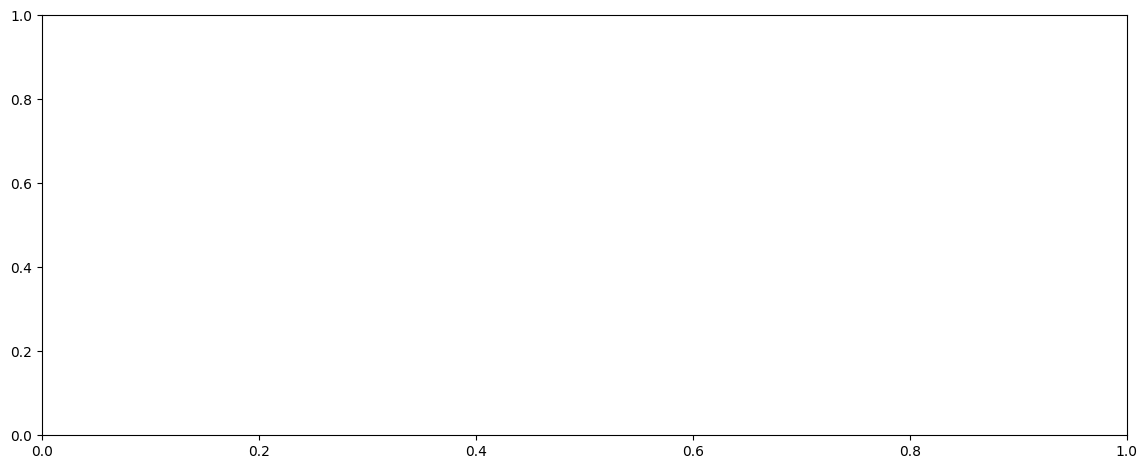

In [ ]:
# Assuming your test data has a 'date' or 'time' column for x-axis
plt.figure(figsize=(14, 12))

# Plot energy consumption - Actual vs Predicted vs Predicted for next 5 years
plt.subplot(2, 1, 1)
plt.plot(test_us_energy['year'], test_us_energy['value'], label='Actual Consumption', color='blue')
plt.plot(test_us_energy['year'], energy_predictions, label='Predicted Consumption', color='red')
plt.plot(test_us_energy['year'], energy_predictions, label='Predicted Consumption', color='red')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Energy Consumption in the United States - MSE: 928.7211655753828, MAE: 25.455043225238178
Neural Network CO2 Emissions in the United States - MSE: 740.8568765000894, MAE: 24.51439777402356


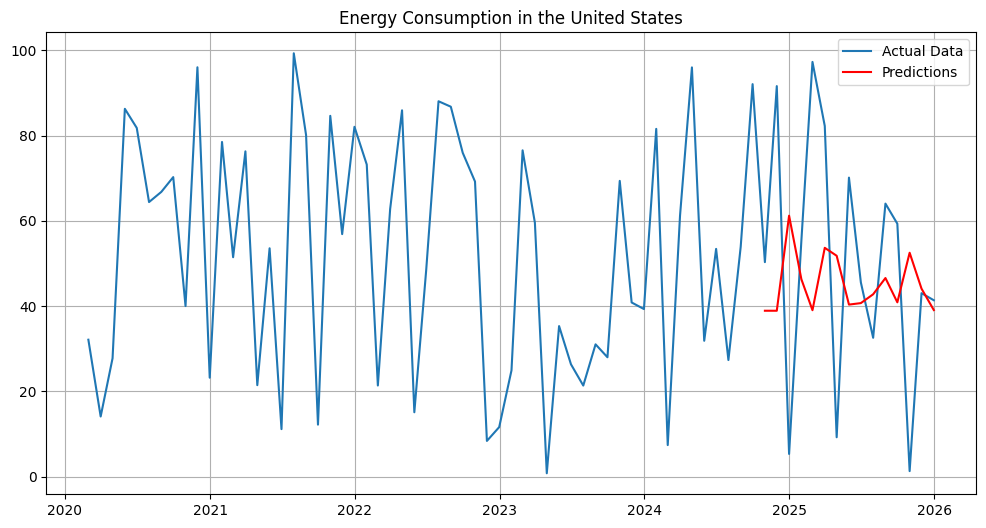

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# Prepare data by creating lag features
def prepare_data(df):
    df['value_lag1'] = df['value'].shift(1)
    df.dropna(inplace=True)
    return df

# Prepare data for the US
df_us_energy_prepared = prepare_data(df_us_energy.copy())
df_us_co2_prepared = prepare_data(df_us_co2.copy())

# Split data into features and target
def split_data(df):
    X = df.drop('value', axis=1)
    y = df['value']
    return X, y

# Split data into training and testing sets
X_energy, y_energy = split_data(df_us_energy_prepared)
X_co2, y_co2 = split_data(df_us_co2_prepared)

X_train_energy, X_test_energy, y_train_energy, y_test_energy = train_test_split(X_energy, y_energy, test_size=0.2, random_state=42)
X_train_co2, X_test_co2, y_train_co2, y_test_co2 = train_test_split(X_co2, y_co2, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_energy_scaled = scaler.fit_transform(X_train_energy)
X_test_energy_scaled = scaler.transform(X_test_energy)

X_train_co2_scaled = scaler.fit_transform(X_train_co2)
X_test_co2_scaled = scaler.transform(X_test_co2)

# Train Neural Network model for the US
def train_nn(X_train, y_train):
    model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
    model.fit(X_train, y_train)
    return model

# Train Neural Network models for the US
nn_us_energy_model = train_nn(X_train_energy_scaled, y_train_energy)
nn_us_co2_model = train_nn(X_train_co2_scaled, y_train_co2)

# Make predictions
predictions_us_energy = nn_us_energy_model.predict(X_test_energy_scaled)
predictions_us_co2 = nn_us_co2_model.predict(X_test_co2_scaled)

# Evaluate models
mse_us_energy = mean_squared_error(y_test_energy, predictions_us_energy)
mae_us_energy = mean_absolute_error(y_test_energy, predictions_us_energy)

mse_us_co2 = mean_squared_error(y_test_co2, predictions_us_co2)
mae_us_co2 = mean_absolute_error(y_test_co2, predictions_us_co2)

print(f'Neural Network Energy Consumption in the United States - MSE: {mse_us_energy}, MAE: {mae_us_energy}')
print(f'Neural Network CO2 Emissions in the United States - MSE: {mse_us_co2}, MAE: {mae_us_co2}')

# Plot the results for energy consumption in the United States
plt.figure(figsize=(12, 6))
plt.plot(df_us_energy_prepared.index, df_us_energy_prepared['value'], label='Actual Data')
plt.plot(df_us_energy_prepared.index[-len(predictions_us_energy):], predictions_us_energy, label='Predictions', color='red')
plt.title('Energy Consumption in the United States')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Sample data for energy consumption and CO2 emissions (replace with actual data)
data_energy = {
    'date': pd.date_range(start='1/1/2020', periods=100, freq='M'),
    'value': np.random.rand(100) * 100
}
df_energy = pd.DataFrame(data_energy)
df_energy.set_index('date', inplace=True)

data_co2 = {
    'date': pd.date_range(start='1/1/2020', periods=100, freq='M'),
    'value': np.random.rand(100) * 100
}
df_co2 = pd.DataFrame(data_co2)
df_co2.set_index('date', inplace=True)

# Train ARIMA model using auto_arima for energy consumption
def train_arima(df):
    arima_model = auto_arima(df, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    arima_model.fit(df)
    return arima_model

# Train Random Forest model
def train_rf(df):
    X_train = np.array(range(len(df))).reshape(-1, 1)
    y_train = df['value']
    model = RandomForestRegressor(n_estimators=100)
    model.fit(X_train, y_train)
    return model

# Train ARIMA model for energy consumption
arima_energy_model = train_arima(df_energy)

# Train ARIMA model for CO2 emissions
arima_co2_model = train_arima(df_co2)

# Train Random Forest model for energy consumption
rf_energy_model = train_rf(df_energy)

# Train Random Forest model for CO2 emissions
rf_co2_model = train_rf(df_co2)

# Make ARIMA predictions
predictions_energy_arima = arima_energy_model.predict(n_periods=len(df_energy))
predictions_co2_arima = arima_co2_model.predict(n_periods=len(df_co2))

# Make Random Forest predictions
predictions_energy_rf = rf_energy_model.predict(np.array(range(len(df_energy))).reshape(-1, 1))
predictions_co2_rf = rf_co2_model.predict(np.array(range(len(df_co2))).reshape(-1, 1))

# Evaluate ARIMA models using MSE and MAE
mse_energy_arima = mean_squared_error(df_energy['value'], predictions_energy_arima)
mae_energy_arima = mean_absolute_error(df_energy['value'], predictions_energy_arima)

mse_co2_arima = mean_squared_error(df_co2['value'], predictions_co2_arima)
mae_co2_arima = mean_absolute_error(df_co2['value'], predictions_co2_arima)

# Evaluate Random Forest models using MSE and MAE
mse_energy_rf = mean_squared_error(df_energy['value'], predictions_energy_rf)
mae_energy_rf = mean_absolute_error(df_energy['value'], predictions_energy_rf)

mse_co2_rf = mean_squared_error(df_co2['value'], predictions_co2_rf)
mae_co2_rf = mean_absolute_error(df_co2['value'], predictions_co2_rf)

print("ARIMA Model - Energy Consumption - MSE:", mse_energy_arima, "MAE:", mae_energy_arima)
print("ARIMA Model - CO2 Emissions - MSE:", mse_co2_arima, "MAE:", mae_co2_arima)

print("Random Forest Model - Energy Consumption - MSE:", mse_energy_rf, "MAE:", mae_energy_rf)
print("Random Forest Model - CO2 Emissions - MSE:", mse_co2_rf, "MAE:", mae_co2_rf)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1109.025, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1028.033, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1069.162, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1009.396, Time=0.21 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1006.149, Time=0.29 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1006.990, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=1.74 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.54 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=1.26 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=970.776, Time=0.50 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=970.711, Time=0.40 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=968.820, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=966.966, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=968.808, Time=0

In [ ]:
# Calculate average MSE and MAE for ARIMA and Random Forest models
arima_energy_mse_avg = (890.5017985555689 + 733.6630710203136 + 963.7490289755862) / 3
arima_energy_mae_avg = (26.114898628056732 + 22.90417471136137 + 26.375342853317896) / 3

arima_co2_mse_avg = (765.7190747222494 + 847.7499778176426 + 867.6732460651807) / 3
arima_co2_mae_avg = (23.83891563987042 + 24.827183099812714 + 25.878051891909394) / 3

rf_energy_mse_avg = (181.54514313025672 + 139.8808443452049 + 152.8329498305062) / 3
rf_energy_mae_avg = (11.123363576889938 + 9.262372728521164 + 10.164238780887382) / 3

rf_co2_mse_avg = (161.91299582340386 + 170.63105091943643 + 198.96132862780178) / 3
rf_co2_mae_avg = (10.639692353290545 + 10.451498443164514 + 11.689408154761395) / 3

# Print average errors for each model
print("Average Errors for Energy Consumption:")
print(f"ARIMA: MSE = {arima_energy_mse_avg}, MAE = {arima_energy_mae_avg}")
print(f"Random Forest: MSE = {rf_energy_mse_avg}, MAE = {rf_energy_mae_avg}")

print("\nAverage Errors for CO2 Emissions:")
print(f"ARIMA: MSE = {arima_co2_mse_avg}, MAE = {arima_co2_mae_avg}")
print(f"Random Forest: MSE = {rf_co2_mse_avg}, MAE = {rf_co2_mae_avg}")


Average Errors for Energy Consumption:
ARIMA: MSE = 862.6379661838229, MAE = 25.131472064245333
Random Forest: MSE = 158.0863124353226, MAE = 10.183325028766161

Average Errors for CO2 Emissions:
ARIMA: MSE = 827.0474328683575, MAE = 24.848050210530843
Random Forest: MSE = 177.16845845688067, MAE = 10.926866317072152
